In [1]:
import json
import os
import matplotlib.pyplot as plt
from template_generate import *
import const
import utils
from config.network import construct_network
from config.param import Param
from dnp_model import DNP
from ncg.np_cg import *
from slim_cg.slim_cg import NetworkColumnGenerationSlim as NCS
from slim_cg.slim_rmp_model import DNPSlim

"""
Run following command in the command line of Turing when using Ray:
export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python
"""

if __name__ == "__main__":
    param = Param()
    arg = param.arg
    arg.backorder_sku_unit_cost = 5000
    arg.capacity_node_ratio = 1
    arg.capacity_ratio = 1
    arg.cardinality_limit = 30
    arg.distance_limit = 5000
    arg.holding_sku_unit_cost = 1
    arg.in_upper_ratio = 0.24
    # arg.in_upper_ratio = 0.024
    arg.lb_end_ratio = 1
    arg.lb_inter_ratio = 1
    arg.node_lb_ratio = 1
    arg.unfulfill_sku_unit_cost = 5000
    arg.backorder = 0
    arg.transportation_sku_unit_cost = 1
    arg.new_data = 1
    arg.num_periods = 40

    # # Data Scale
    arg.conf_label = 7
    arg.T =   7
    arg.pick_instance = 8

    utils.configuration(arg.conf_label, arg)
    print(
        json.dumps(
            arg.__dict__,
            indent=2,
            sort_keys=True,
        )
    )

[facinv] 2024-09-12 17:56:38,841: -- The FACINV python package --
[facinv] 2024-09-12 17:56:38,848:   LLLGZ, 2023 (c)   
[facinv] 2024-09-12 17:56:38,850: :solution      to ./out
[facinv] 2024-09-12 17:56:38,851: :data          to ./data
[facinv] 2024-09-12 17:56:38,852: :logs and tmps to ./tmp
{
  "DNP": 1,
  "NCS": 1,
  "T": 7,
  "add_cardinality": 0,
  "add_distance": 0,
  "add_in_upper": 1,
  "backend": "gurobi",
  "backorder": 0,
  "backorder_sku_unit_cost": 5000,
  "bool_use_ncg": 1,
  "capacity": 1,
  "capacity_node_ratio": 1,
  "capacity_ratio": 1,
  "cardinality": 1,
  "cardinality_limit": 30,
  "cg_itermax": 10,
  "cg_method_mip_heuristic": -1,
  "cg_mip_recover": 1,
  "cg_rmp_mip_iter": 10,
  "check_cost_cg": 0,
  "check_number": 3,
  "column_pool_len": 3,
  "conf_label": 7,
  "covering": 1,
  "cus_num": 4,
  "d": 150,
  "del_col_alg": 3,
  "del_col_freq": 3,
  "del_col_stra": 1,
  "demand_type": 1,
  "distance": 0,
  "distance_limit": 5000,
  "edge_lb": 1,
  "fpath": "/home

In [2]:
arg.fpath = "/home/chuwen/cora/data/us_generate_202403151725/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
print(len(sku_list), len(plant_list), len(warehouse_list), len(customer_list))

[facinv] 2024-09-12 17:57:08,071: time scale 7
[facinv] 2024-09-12 17:57:08,072: generating the signature of this problem
[facinv] 2024-09-12 17:57:08,073: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403151725/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-12 17:57:08,074: current data has been generated before
[facinv] 2024-09-12 17:57:08,074: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-12 17:59:56,117: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-12 17:59:57,405: setting arg.sku_list...
141 23 28 519


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the custom colormap based on specified RGB values
rbgs = [
    (0.0, 0.6056031611752245, 0.9786801175696073),
    (0.8888735002725197, 0.4356491903481899, 0.2781229361419437),
    (0.2422242978521988, 0.6432750931576305, 0.3044486515341153),
    (0.7644401754934357, 0.44411177946877667, 0.8242975359232757),
    (0.6755439572114058, 0.5556623322045815, 0.09423433626639476),
    (4.821181565883848e-7, 0.6657589812923558, 0.6809969518707946),
    (0.930767491919665, 0.3674771896571418, 0.5757699667547833),
    (0.7769816661712935, 0.5097431319944512, 0.1464252569555494),
    (3.8077343912812365e-7, 0.6642678029460113, 0.5529508754522481),
    (0.558464964115081, 0.5934846564332881, 0.11748125233232112),
    (5.947623876556563e-7, 0.6608785231434255, 0.7981787608414301),
    (0.6096707676128643, 0.49918492100827794, 0.9117812665042643),
    (0.3800016049820355, 0.5510532724353505, 0.9665056985227145),
    (0.9421816479542178, 0.37516423354097606, 0.4518168202944591),
    (0.8684020893043973, 0.3959893639954848, 0.7135147524811882),
    (0.423146743646308, 0.6224954944199984, 0.1987706025213047),
]
juliacmaps = ListedColormap(rbgs)

# Configure matplotlib rcParams to use LaTeX and set up general plotting parameters
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif font family
        "font.serif": ["Times New Roman"],  # Specify Times New Roman as the serif font
        "font.size": 14,  # General font size
    }
)
colors = juliacmaps(np.linspace(0, 1, len(rbgs)))  # Extract colors from the colormap
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)


[facinv] 2024-09-11 10:10:20,544: time scale 7
[facinv] 2024-09-11 10:10:20,545: generating the signature of this problem
[facinv] 2024-09-11 10:10:20,546: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403151725/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 10:10:20,546: current data has been generated before
[facinv] 2024-09-11 10:10:20,546: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:14:28,067: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:14:30,781: setting arg.sku_list...


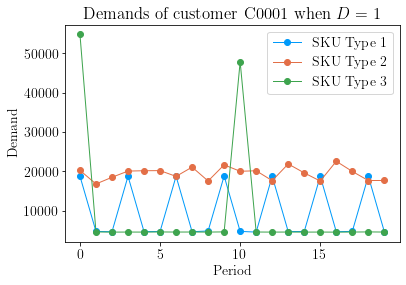

In [8]:
arg.fpath = "/home/chuwen/cora/data/us_generate_202403151725/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
customer  = customer_list[0]
lenth = max(set(pd.DataFrame(customer.demand)['demand'].reset_index()['time'].to_list())) + 1
demand_list_1 = {period:0 for period in range(lenth)}
demand_list_2 = {period:0 for period in range(lenth)}
demand_list_3 = {period:0 for period in range(lenth)}
for period in range(lenth):
    for sku in sku_list:
        if int(sku.idx[-4:]) % 3 == 0:
            demand_list_1[period] = demand_list_1[period] + customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 2 == 0:
            demand_list_2[period] = demand_list_2[period] + customer.demand[period][sku]
        else:
            demand_list_3[period] = demand_list_3[period] + customer.demand[period][sku]

# Create the plot and use custom colormap colors
fig, ax = plt.subplots()
ax.plot(
    list(demand_list_1.keys()),
    list(demand_list_1.values()),
    color=colors[0],  # Use the first color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 1"
)
ax.plot(
    list(demand_list_2.keys()),
    list(demand_list_2.values()),
    color=colors[1],  # Use the second color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 2"
)
ax.plot(
    list(demand_list_3.keys()),
    list(demand_list_3.values()),
    color=colors[2],  # Use the third color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 3"
)

# Set labels and title
ax.set_xlabel('Period')  # Set x-axis label
ax.set_ylabel('Demand')  # Set y-axis label
ax.set_title('Demands of customer {} when $D = 1$'.format(customer))  # Set plot title
ax.legend(loc='upper right')  # Display legend in the upper right corner

# Save the figure as a PDF file
plt.savefig('/home/chuwen/cora/demand_plot_D1.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

[facinv] 2024-09-11 16:30:25,127: time scale 7
[facinv] 2024-09-11 16:30:25,129: generating the signature of this problem
[facinv] 2024-09-11 16:30:25,129: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403152049/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 16:30:25,130: current data has been generated before
[facinv] 2024-09-11 16:30:25,130: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 16:32:51,674: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 16:32:53,686: setting arg.sku_list...


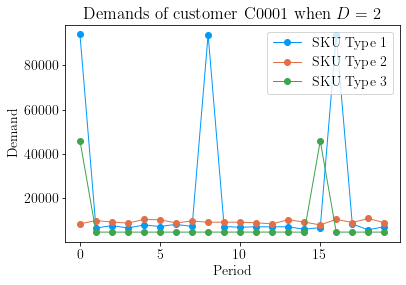

In [112]:

# Assuming utils.scale and argument configurations are correctly set as per your context
arg.fpath = "/home/chuwen/cora/data/us_generate_202403152049/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)

customer = customer_list[0]
lenth = max(set(pd.DataFrame(customer.demand)['demand'].reset_index()['time'].to_list())) + 1
demand_list_1 = {period: 0 for period in range(lenth)}
demand_list_2 = {period: 0 for period in range(lenth)}
demand_list_3 = {period: 0 for period in range(lenth)}

# Aggregate demand based on SKU indices
for period in range(lenth):
    for sku in sku_list:
        if int(sku.idx[-4:]) % 3 == 0:
            demand_list_1[period] += customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 2 == 0:
            demand_list_2[period] += customer.demand[period][sku]
        else:
            demand_list_3[period] += customer.demand[period][sku]

# Create the plot
fig, ax = plt.subplots()
ax.plot(
    list(demand_list_1.keys()),
    list(demand_list_1.values()),
    color=colors[0],  # Use color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 1"
)
ax.plot(
    list(demand_list_2.keys()),
    list(demand_list_2.values()),
    color=colors[1],  # Use color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 2"
)
ax.plot(
    list(demand_list_3.keys()),
    list(demand_list_3.values()),
    color=colors[2],  # Use color from the custom colormap
    linewidth=1.0,
    linestyle="-",
    marker='o',
    label="SKU Type 3"
)

# Set labels and title
ax.set_xlabel('Period')  # Set x-axis label
ax.set_ylabel('Demand')  # Set y-axis label
ax.set_title('Demands of customer {} when $D = 2$'.format(customer))  # Set title
ax.legend(loc='upper right')  # Display legend in the upper right corner
plt.savefig('/home/chuwen/cora/demand_plot_D2.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


[facinv] 2024-09-11 10:18:55,282: time scale 7
[facinv] 2024-09-11 10:18:55,283: generating the signature of this problem
[facinv] 2024-09-11 10:18:55,284: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403122258/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 10:18:55,284: current data has been generated before
[facinv] 2024-09-11 10:18:55,285: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:23:04,315: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:23:06,062: setting arg.sku_list...


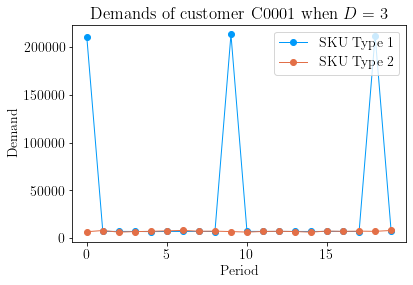

In [10]:
arg.fpath = "/home/chuwen/cora/data/us_generate_202403122258/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)

customer  = customer_list[0]
lenth = max(set(pd.DataFrame(customer.demand)['demand'].reset_index()['time'].to_list())) + 1
demand_list_2 = {period:0 for period in range(lenth)}
demand_list_3 = {period:0 for period in range(lenth)}
for period in range(lenth):
    for sku in sku_list:
        if int(sku.idx[-4:]) % 2 == 0:
            demand_list_2[period] = demand_list_2[period] + customer.demand[period][sku]
        else:
            demand_list_3[period] = demand_list_3[period] + customer.demand[period][sku]

fig, ax = plt.subplots()
ax.plot(list(demand_list_2.keys()),list(demand_list_2.values()),color=colors[0], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 1")
ax.plot(list(demand_list_3.keys()),list(demand_list_3.values()),color=colors[1], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 2")
ax.set_xlabel('Period') #设置x轴名称 x label
ax.set_ylabel('Demand') #设置y轴名称 y label
ax.set_title('Demands of customer {} when $D = 3$'.format(customer)) 
ax.legend(loc='upper right') #自动检测要在图例中显示的元素，并且显示
plt.savefig('/home/chuwen/cora/demand_plot_D3.pdf', format='pdf', bbox_inches='tight')

plt.show() #图形可视化

[facinv] 2024-09-11 10:23:09,584: time scale 7
[facinv] 2024-09-11 10:23:09,585: generating the signature of this problem
[facinv] 2024-09-11 10:23:09,585: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403122342/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 10:23:09,585: current data has been generated before
[facinv] 2024-09-11 10:23:09,585: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:27:10,786: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:27:14,475: setting arg.sku_list...


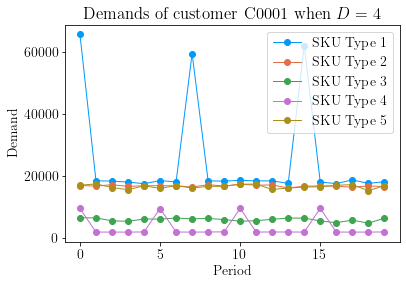

In [11]:
arg.fpath = "/home/chuwen/cora/data/us_generate_202403122342/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
customer  = customer_list[0]
lenth = max(set(pd.DataFrame(customer.demand)['demand'].reset_index()['time'].to_list())) + 1
demand_list_1 = {period:0 for period in range(lenth)}
demand_list_2 = {period:0 for period in range(lenth)}
demand_list_3 = {period:0 for period in range(lenth)}
demand_list_4 = {period:0 for period in range(lenth)}
demand_list_5 = {period:0 for period in range(lenth)}
for period in range(lenth):
    for sku in sku_list:
        if int(sku.idx[-4:]) % 5 == 0:
            demand_list_1[period] = demand_list_1[period] + customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 4 == 0:
            demand_list_2[period] = demand_list_2[period] + customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 3 == 0:
            demand_list_3[period] = demand_list_3[period] + customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 2 == 0:
            demand_list_4[period] = demand_list_4[period] + customer.demand[period][sku]
        else:
            demand_list_5[period] = demand_list_5[period] + customer.demand[period][sku]
fig, ax = plt.subplots()
ax.plot(list(demand_list_1.keys()),list(demand_list_1.values()),color=colors[0], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 1")
ax.plot(list(demand_list_2.keys()),list(demand_list_2.values()),color=colors[1], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 2")
ax.plot(list(demand_list_3.keys()),list(demand_list_3.values()),color=colors[2], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 3")
ax.plot(list(demand_list_4.keys()),list(demand_list_4.values()),color=colors[3], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 4")
ax.plot(list(demand_list_5.keys()),list(demand_list_5.values()),color=colors[4], linewidth=1.0, linestyle="-", marker='o',label="SKU Type 5")
ax.set_xlabel('Period') #设置x轴名称 x label
ax.set_ylabel('Demand') #设置y轴名称 y label
ax.set_title('Demands of customer {} when $D = 4$'.format(customer)) 
ax.legend(loc='upper right') #自动检测要在图例中显示的元素，并且显示
plt.savefig('demand_plot_D4.pdf', format='pdf', bbox_inches='tight')
plt.show() #图形可视化

[facinv] 2024-09-11 10:27:18,282: time scale 7
[facinv] 2024-09-11 10:27:18,283: generating the signature of this problem
[facinv] 2024-09-11 10:27:18,284: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403130034/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 10:27:18,284: current data has been generated before
[facinv] 2024-09-11 10:27:18,284: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:31:50,593: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 10:31:52,717: setting arg.sku_list...


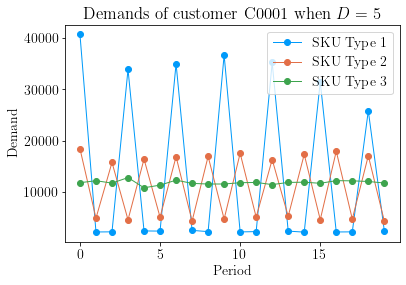

In [12]:
arg.fpath = "/home/chuwen/cora/data/us_generate_202403130034/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)

customer  = customer_list[0]
lenth = max(set(pd.DataFrame(customer.demand)['demand'].reset_index()['time'].to_list())) + 1
demand_list_1 = {period:0 for period in range(lenth)}
demand_list_2 = {period:0 for period in range(lenth)}
demand_list_3 = {period:0 for period in range(lenth)}
for period in range(lenth):
    for sku in sku_list:
        if int(sku.idx[-4:]) % 6 == 0:
            demand_list_1[period] = demand_list_1[period] + customer.demand[period][sku]
        elif int(sku.idx[-4:]) % 4 == 0:
            demand_list_2[period] = demand_list_2[period] + customer.demand[period][sku]
        else:
            demand_list_3[period] = demand_list_3[period] + customer.demand[period][sku]

fig, ax = plt.subplots()
ax.plot(list(demand_list_1.keys()),list(demand_list_1.values()),color=colors[0], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 1")
ax.plot(list(demand_list_2.keys()),list(demand_list_2.values()),color=colors[1], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 2")
ax.plot(list(demand_list_3.keys()),list(demand_list_3.values()),color=colors[2], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 3")
ax.set_xlabel('Period') #设置x轴名称 x label
ax.set_ylabel('Demand') #设置y轴名称 y label
ax.set_title('Demands of customer {} when $D = 5$'.format(customer)) 
ax.legend(loc='upper right') #自动检测要在图例中显示的元素，并且显示
plt.savefig('demand_plot_D5.pdf', format='pdf', bbox_inches='tight')
plt.show() #图形可视化

In [103]:
arg.fpath = "/home/chuwen/cora/data/data_0inv/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)

[facinv] 2024-09-11 16:12:11,022: time scale 7
[facinv] 2024-09-11 16:12:11,024: generating the signature of this problem
[facinv] 2024-09-11 16:12:11,025: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/data_0inv/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 16:12:11,026: current data has been generated before
[facinv] 2024-09-11 16:12:11,026: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 16:13:25,191: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 16:13:25,799: setting arg.sku_list...


In [71]:
customer  = customer_list[0]
df = pd.DataFrame(customer.demand)['demand'].reset_index()
df_new = df.pivot(index='time', columns='sku', values='demand').reset_index()
df_new.drop(df_new.columns[0], axis=1,inplace=True)
df_new = df_new.T

/home/chuwen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/chuwen/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6fc89b6550>
Traceback (most recent call last):
  File "/home/chuwen/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/chuwen/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(fi

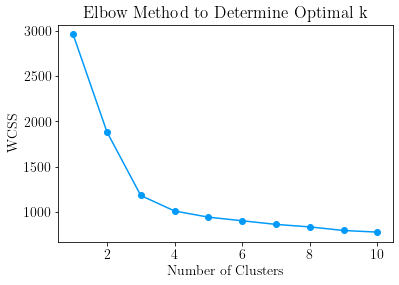

                0    1    2     3    4    5     6    7    8     9  ...   11  \
sku                                                                ...        
SKU_SKU0002   139  182  138   170  198  187   113  126   85    97  ...   97   
SKU_SKU0003   161  127  162    81  188  145   170  197  108   175  ...  109   
SKU_SKU0004   971  235  798   203  664  146   729  200  670   296  ...  145   
SKU_SKU0005    74  141  154   111   82  189    70   89   91   140  ...  123   
SKU_SKU0006   733  106  119  1823   71  134  1200  123   92  2657  ...   69   
...           ...  ...  ...   ...  ...  ...   ...  ...  ...   ...  ...  ...   
SKU_SKU0138  2868   60  102  2461  128  124  2723  147  125   702  ...   80   
SKU_SKU0139    51   87  162   111   76  127   150   67  128   182  ...  111   
SKU_SKU0140   546  188  446   127  604  268   425  130  436   118  ...  108   
SKU_SKU0141   137   89  135   155  108  178   159   84  117    59  ...  104   
SKU_SKU0142   136  143   97   147   90  108   125  1

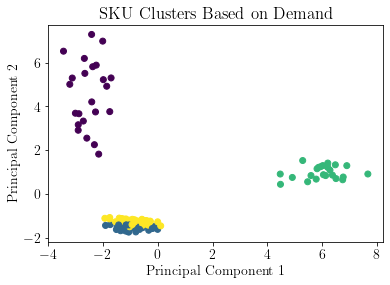

In [104]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming df_new is your DataFrame with SKUs as columns and demand values as data
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to determine optimal k
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the chosen number of clusters (e.g., k=3)
optimal_k = 4  # You can adjust this based on the Elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the DataFrame
df_new['Cluster'] = clusters

# Display the clustered data
print(df_new)

# Optional: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('SKU Clusters Based on Demand')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [105]:
demand_1 = df_new[df_new['Cluster']==1]
demand_2 = df_new[df_new['Cluster']==2]
demand_3 = df_new[df_new['Cluster']==3]
demand_4 = df_new[df_new['Cluster']==4]

In [106]:
def oper(demand_list):
    demand_list.drop(columns=['Cluster'], axis=1,inplace=True)
    demand_list_sums = demand_list.sum(axis=0)
    return demand_list_sums
demand_1_sums = oper(demand_1)
demand_2_sums = oper(demand_2)  
demand_3_sums = oper(demand_3)
demand_4_sums = oper(demand_4)

/tmp/ipykernel_2529200/294289509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_list.drop(columns=['Cluster'], axis=1,inplace=True)
/tmp/ipykernel_2529200/294289509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_list.drop(columns=['Cluster'], axis=1,inplace=True)
/tmp/ipykernel_2529200/294289509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_list.drop(columns=['Cluster'], axis=1,inplace=True)
/tmp/ip

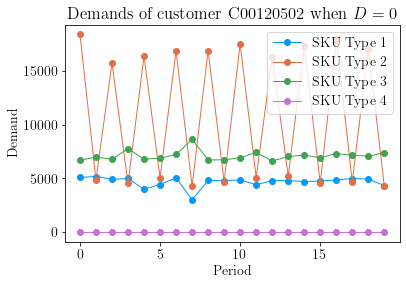

In [110]:

customer  = customer_list[0]
fig, ax = plt.subplots()
ax.plot(list(demand_1_sums),color=colors[0], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 1")
ax.plot(list(demand_2_sums),color=colors[1], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 2")
ax.plot(list(demand_3_sums),color=colors[2], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 3")
ax.plot(list(demand_4_sums),color=colors[3], linewidth=1.0, linestyle="-", marker='o', label="SKU Type 4")
ax.set_xlabel('Period') #设置x轴名称 x label
ax.set_ylabel('Demand') #设置y轴名称 y label
ax.set_title('Demands of customer {} when $D = 0$'.format(customer)) 
ax.legend(loc='upper right') #自动检测要在图例中显示的元素，并且显示
plt.savefig('demand_plot_D0_0inv.pdf', format='pdf', bbox_inches='tight')
plt.show() #图形可视化

In [127]:
import pickle
arg.fpath = "/home/chuwen/cora/data/data_0inv_with_location/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
utils.add_attr(edge_list, node_list, arg, const)
network = construct_network(node_list, edge_list, sku_list)
solver = arg.backend.upper()
pickle.dump(network, open('0inv_with_location.pickle', 'wb'))
# load graph object from file
G = pickle.load(open('0inv_with_location.pickle', 'rb'))

[facinv] 2024-09-11 17:28:55,642: time scale 7
[facinv] 2024-09-11 17:28:55,643: generating the signature of this problem
[facinv] 2024-09-11 17:28:55,644: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/data_0inv_with_location/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 17:28:55,644: current data has been generated before
[facinv] 2024-09-11 17:28:55,644: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:29:59,122: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:29:59,692: setting arg.sku_list...


In [128]:
m = folium.Map(location=[40, -100], zoom_start=3)
# 标记不同的颜色
for node in G.nodes:
    if node.location is None or np.isnan(node.location).any():
        print(f"Skipping node {node.idx} due to invalid location: {node.location}")
        continue  # Skip nodes with invalid locations
    if str(node).startswith('C'):
        color = 'red'
    elif str(node).startswith('T'):
        color = 'blue'
    else:
        color = 'green'
    folium.Marker(location=node.location, popup=f"Name: {node.idx}", icon=folium.Icon(color=color)).add_to(m)

# for edge in G.edges:
#     folium.PolyLine(locations=[edge[0].location, edge[1].location], color='blue').add_to(m)

# 保存地图为 HTML 文件
m.save('0inv_with_location.pickle.html')
print('save over')

save over


In [124]:
import pickle
arg.fpath = "/home/chuwen/cora/data/us_generate_202403151725/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
utils.add_attr(edge_list, node_list, arg, const)
network = construct_network(node_list, edge_list, sku_list)
solver = arg.backend.upper()
pickle.dump(network, open('1725.pickle', 'wb'))
# load graph object from file
G = pickle.load(open('1725.pickle', 'rb'))

[facinv] 2024-09-11 17:06:04,132: time scale 7
[facinv] 2024-09-11 17:06:04,133: generating the signature of this problem
[facinv] 2024-09-11 17:06:04,133: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/us_generate_202403151725/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 17:06:04,134: current data has been generated before
[facinv] 2024-09-11 17:06:04,134: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:08:28,524: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:08:29,710: setting arg.sku_list...


In [125]:

m = folium.Map(location=[40, -100], zoom_start=3)
# 标记不同的颜色
for node in G.nodes:
    if node.location is None or np.isnan(node.location).any():
        print(f"Skipping node {node.idx} due to invalid location: {node.location}")
        continue  # Skip nodes with invalid locations
    if str(node).startswith('C'):
        color = 'red'
    elif str(node).startswith('T'):
        color = 'blue'
    else:
        color = 'green'
    folium.Marker(location=node.location, popup=f"Name: {node.idx}", icon=folium.Icon(color=color)).add_to(m)

# 保存地图为 HTML 文件
m.save('1725.html')
print('save over')

save over


In [129]:
import pickle
arg.fpath = "/home/chuwen/cora/data/cases/data_1219/"
(
    sku_list,
    plant_list,
    warehouse_list,
    customer_list,
    edge_list,
    network,
    node_list,
    *_,
) = utils.scale(arg.pick_instance, arg.fpath, arg)
utils.add_attr(edge_list, node_list, arg, const)
network = construct_network(node_list, edge_list, sku_list)
solver = arg.backend.upper()
pickle.dump(network, open('1219.pickle', 'wb'))
# load graph object from file
G = pickle.load(open('1219.pickle', 'rb'))


m = folium.Map(location=[40, -100], zoom_start=3)
# 标记不同的颜色
for node in G.nodes:
    if node.location is None or np.isnan(node.location).any():
        print(f"Skipping node {node.idx} due to invalid location: {node.location}")
        continue  # Skip nodes with invalid locations
    if str(node).startswith('C'):
        color = 'red'
    elif str(node).startswith('T'):
        color = 'blue'
    else:
        color = 'green'
    folium.Marker(location=node.location, popup=f"Name: {node.idx}", icon=folium.Icon(color=color)).add_to(m)

# 保存地图为 HTML 文件
m.save('1219.html')
print('save over')

[facinv] 2024-09-11 17:32:33,204: time scale 7
[facinv] 2024-09-11 17:32:33,205: generating the signature of this problem
[facinv] 2024-09-11 17:32:33,206: {
  "customer_num": 519,
  "data_dir": "/home/chuwen/cora/data/cases/data_1219/",
  "one_period": false,
  "plant_num": 23,
  "sku_num": 141,
  "warehouse_num": 28
}
[facinv] 2024-09-11 17:32:33,207: current data has been generated before
[facinv] 2024-09-11 17:32:33,207: reading from cache: ./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:33:49,835: dumping a temporary cache @./out/home-519-False-23-141-28.pk
[facinv] 2024-09-11 17:33:50,516: setting arg.sku_list...
save over
